In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [9, 9]

### Lecture15.ipynb

### Last time:

- Started studying dynamical systems formed by iterating complex polynomials. E.g. 
f(z)=z^2
orbit of 0:
0 -> 0 -> 0 -> 0 -> 
0.2 -> 0.04 -> 0.0016 -> ...

2 -> 4 -> 16 -> 256 -> ...


- Interested in the long term behaviour of *orbits* 
z -> f(z) -> f(f(z)) -> ..
- This long term behaviour will depend on the initial point.
- The simplest question we can ask: which points end up escaping to infinity, and which points do not

For f(z)=z^2, if |z|<1, then orbit goes to 0. Otherwise, if |z|>1, orbit escapes to infinity.

Escaping set is everything outside the unit disk.
Non-escaping set, K(f), is everything
inside the unit disk.


- We created an image of the escaping set for f(z)=z^2-1 

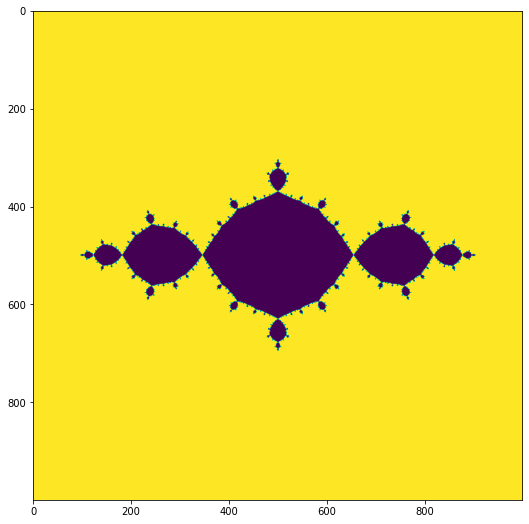

In [ ]:
def f(z):
  return z**2-1

def doesEscape(f,z):
  '''
  Checks whether the sequence z, f(z), f(f(z)), f(f(f(z))).... escape
  to infinity or not.

  Inputs: 
   -- f, a function
   -- z, a complex number
   Returns:
   true/false depending on whether orbit escapes to infinity or not.

  '''
  current = z 
  for _ in range(100):
    # If |z| > 2 then |z^2-1| > 3 and so we are sure to escape.
    if abs(current) > 2:
      return True
    current = f(current)
  return False 

def computeEscaping(f, subs):
  '''
  Inputs: 

  -- f,  a function C->C
  -- subs, an integer, number of subdivisions



    We'll subdivide the square [-2,2]^2 into little squares
        and test points in the center of each square.
        If the tested point escapes, we mark a '1' in the matrix.
  '''
  delta = 2/subs
  results = np.zeros((subs,subs)) # square matrix with dimensions sub x sub
  for i in range(subs):
    for j in range(subs):
      z = complex(-2+delta+i*2*delta, -2+delta+j*2*delta)
      if doesEscape(f,z):
        results[j,i] = 1
  return results 


# Plot an image of the matrix, where 
# 1s are yellow and 0s are purple:
plt.imshow(computeEscaping(f,1000))

### Lecture 15 (Today)

1. Zoom in to see more detail 
2. Color by how long it takes to escape -- this will give more information about the dynamical system.
3. Explore the variety of behaviour that we can see.
Interesting functions:
- f(z)=z^2
- f(z)=z^2-1
- f(z)=z^2+i 
- f(z)=z^2+0.01/z^2 
- f(z)=z^4+0.01/z^4
- f(z)=z^2-0.5921/z
- f(z)=z^3-0.1/z^3
Also, look at transitions as we vary the parameters continuously.
E.g. z^2+1/4+t as t->0.
4. Think about how to make things run faster/look better.
5. Can you explain any of your experimental observations? E.g, 
why is it sometimes that the non-escaping set is very "thin"? 
Why does it sometimes look like dust?

# Zooming

In [ ]:
def doesEscape(f,z, iter):
  '''
  Checks whether the sequence z, f(z), f(f(z)), f(f(f(z))).... escape
  to infinity or not.

  Inputs: 
   -- f, a function
   -- z, a complex number
   Returns:
   # of iterations required to escape

  '''
  current = z 
  for i in range(iter):
    # If |z| > 2 then |z^2-1| > 3 and so we are sure to escape.
    if abs(current) > 2:
      break
    current = f(current)
  return i/iter

def computeEscaping(f, square, subs, iter):
  '''
  Inputs: 

  -- f,  a function C->C
  -- subs, an integer, number of subdivisions



    We'll subdivide the square [-2,2]^2 into little squares
        and test points in the center of each square.
        If the tested point escapes, we mark a '1' in the matrix.
  '''
  start = square[0]
  end = square[1]
  delta = (square[1]-square[0])/subs
  results = np.zeros((subs,subs)) # square matrix with dimensions sub x sub
  for i in range(subs):
    for j in range(subs):
      z = complex(start+delta/2+i*delta, start+delta/2+j*delta)
      results[j,i] = doesEscape(f, z, iter)
  return results 

def zoom(f, frames, subs, iter):
  

# Color maps 


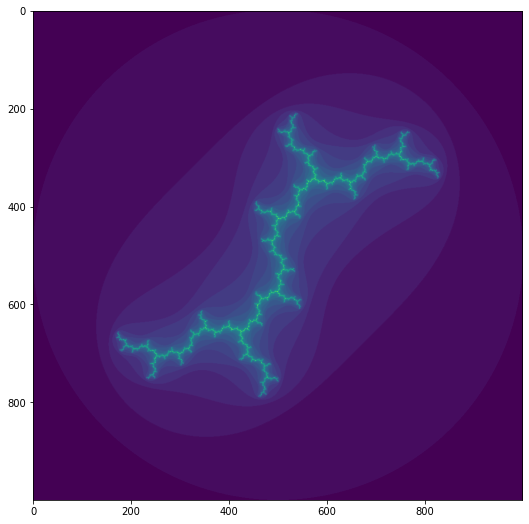

In [ ]:
def doesEscape(f,z, iter):
  '''
  Checks whether the sequence z, f(z), f(f(z)), f(f(f(z))).... escape
  to infinity or not.

  Inputs: 
   -- f, a function
   -- z, a complex number
   Returns:
   # of iterations required to escape

  '''
  current = z 
  for i in range(iter):
    # If |z| > 2 then |z^2-1| > 3 and so we are sure to escape.
    if abs(current) > 2:
      break
    current = f(current)
  return i/iter

def computeEscaping(f, subs, iter):
  '''
  Inputs: 

  -- f,  a function C->C
  -- subs, an integer, number of subdivisions



    We'll subdivide the square [-2,2]^2 into little squares
        and test points in the center of each square.
        If the tested point escapes, we mark a '1' in the matrix.
  '''
  delta = 2/subs
  results = np.zeros((subs,subs)) # square matrix with dimensions sub x sub
  for i in range(subs):
    for j in range(subs):
      z = complex(-2+delta+i*2*delta, -2+delta+j*2*delta)
      results[j,i] = doesEscape(f, z, iter)
  return results 


# Plot an image of the matrix, where 
# 1s are yellow and 0s are purple:
fract_set = computeEscaping(lambda z: z**2+1j, 1000, 30)
plt.imshow(fract_set, cmap = 'viridis')


# Experimentation

f(z)=z^2-1
f(z)=z^2+i
f(z)=z^2+0.01/z^2
f(z)=z^4+0.01/z^4
f(z)=z^2-0.5921/z
f(z)=z^3-0.1/z^3

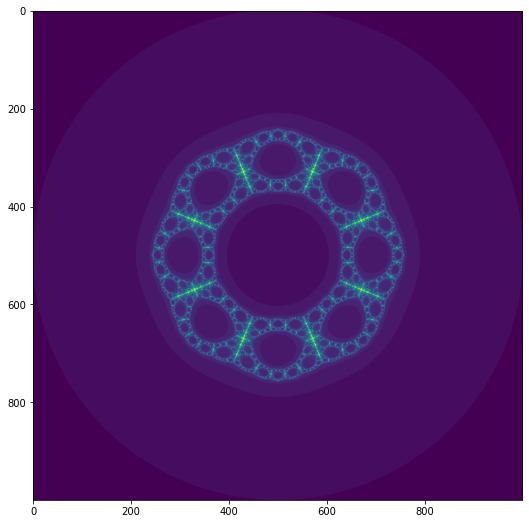

In [ ]:
fract_set = computeEscaping(lambda z: (z**5)-(.145/z**3), 1000, 30)
plt.imshow(fract_set, cmap = 'viridis')

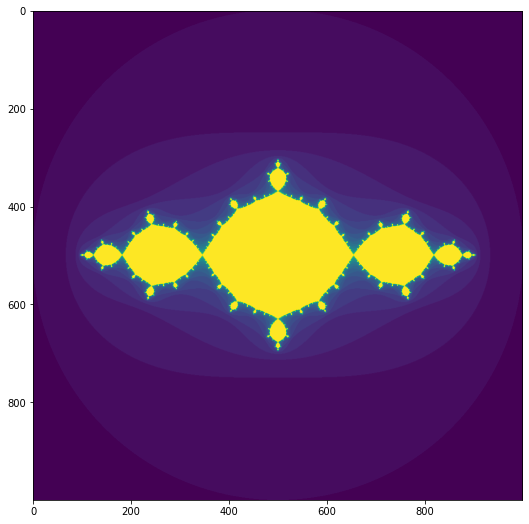

In [ ]:
fract_set = computeEscaping(lambda z: z**2-1, 1000, 30)
plt.imshow(fract_set, cmap = 'viridis')

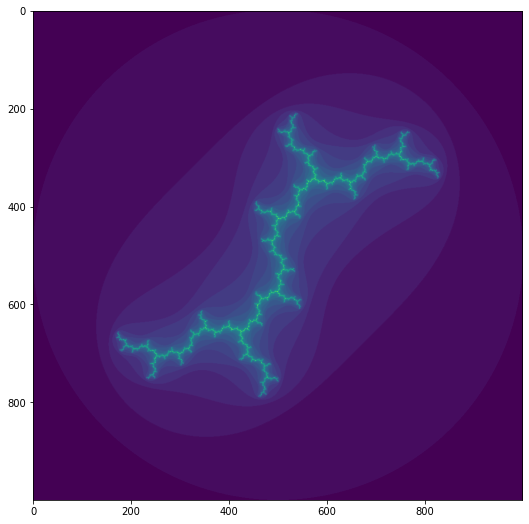

In [ ]:
fract_set = computeEscaping(lambda z: z**2+1j, 1000, 30)
plt.imshow(fract_set, cmap = 'viridis')

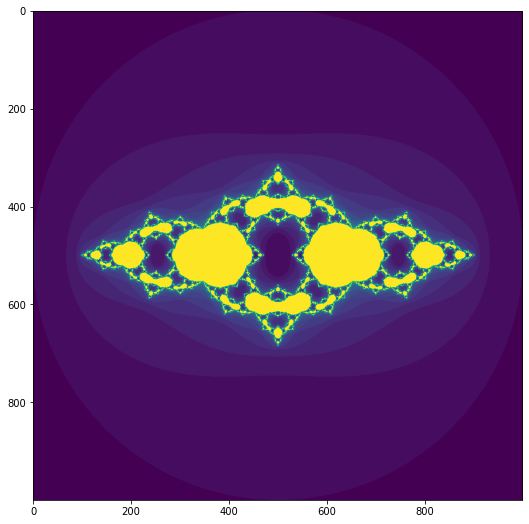

In [ ]:
fract_set = computeEscaping(lambda z: z**2+(.0314/z**2)-1, 1000, 30)
plt.imshow(fract_set, cmap = 'viridis')

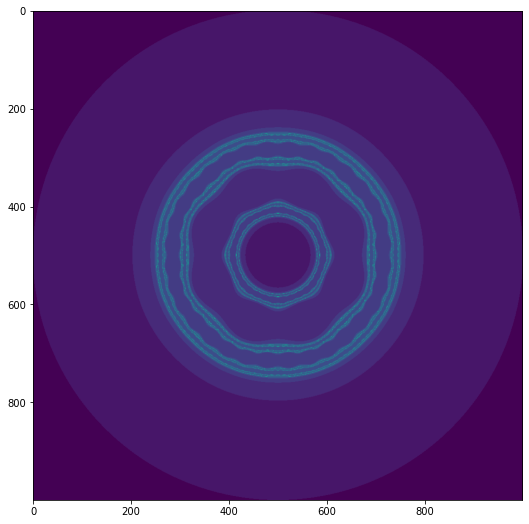

In [ ]:
fract_set = computeEscaping(lambda z: z**4+(0.01/z**4), 1000, 30)
plt.imshow(fract_set, cmap = 'viridis')

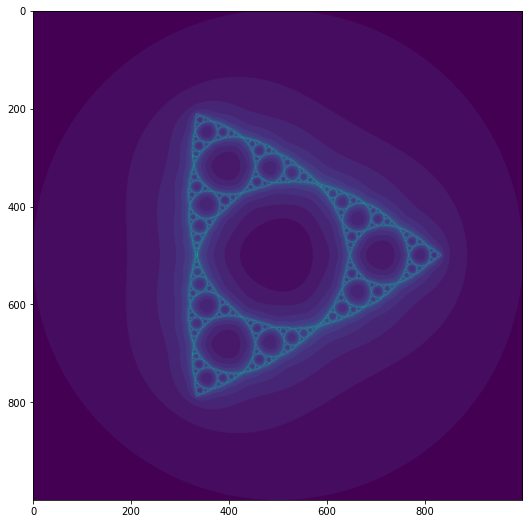

In [ ]:
fract_set = computeEscaping(lambda z: z**2-(0.5921/z), 1000, 30)
plt.imshow(fract_set, cmap = 'viridis')

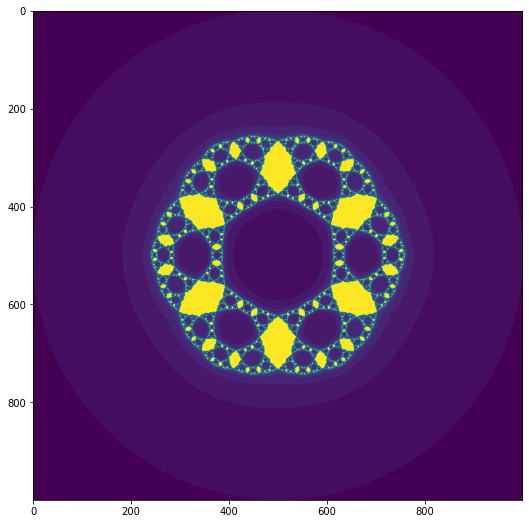

In [ ]:
fract_set = computeEscaping(lambda z: z**3-(0.1/z**3), 1000, 30)
plt.imshow(fract_set, cmap = 'viridis')